In [2]:
from datasets import load_dataset, concatenate_datasets
import matplotlib.pyplot as plt

# Load STS datasets
sts12 = load_dataset("mteb/sts12-sts")
sts13 = load_dataset("mteb/sts13-sts")
sts14 = load_dataset("mteb/sts14-sts")
sts15 = load_dataset("mteb/sts15-sts")
sts16 = load_dataset("mteb/sts16-sts")
stsb = load_dataset("mteb/stsbenchmark-sts")
sickr = load_dataset("mteb/sickr-sts")

In [3]:
# Combine datasets into one
sts12_test = sts12["test"]
sts13_test = sts13["test"]
sts14_test = sts14["test"]
sts15_test = sts15["test"]
sts16_test = sts16["test"]
stsb_validation = stsb["validation"]
stsb_test = stsb["test"]
sickr_test = sickr["test"]

dataset = concatenate_datasets([sts12_test, sts13_test, sts14_test, sts15_test, sts16_test, stsb_validation, stsb_test, sickr_test])

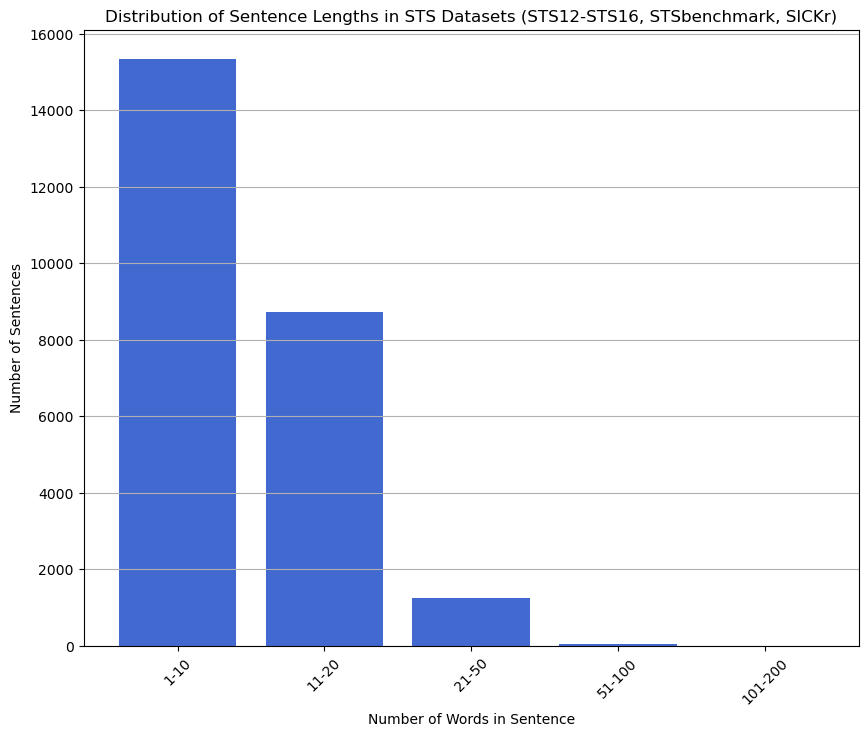

In [4]:
word_count = [len(doc.split()) for doc in dataset['sentence1']]

bins = [0, 10, 20, 50, 100, 200]
bin_labels = ["1-10", "11-20", "21-50", "51-100", "101-200"]

bin_values = []
for i in range(len(bins) - 1):
    bin_values.append(sum([1 for count in word_count if bins[i] < count <= bins[i + 1]]))

# Data for plotting
bins = bin_labels
counts = bin_values

# Creating the plot
plt.figure(figsize=(10,8))
plt.bar(bins, counts, color="#4269D0")
plt.xlabel('Number of Words in Sentence')
plt.ylabel('Number of Sentences')
plt.title('Distribution of Sentence Lengths in STS Datasets (STS12-STS16, STSbenchmark, SICKr)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.rcParams["font.family"] = "Inter"
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", [ "#4269D0","#3BA951", "#EFB117", "#FF725C"])

# higher resolution output without saving the file
plt.savefig('sts_distribution.png', dpi=300)

# Show the plot
plt.show()
